**Simple Implementation of Convolutional Neural Network (CNN)**

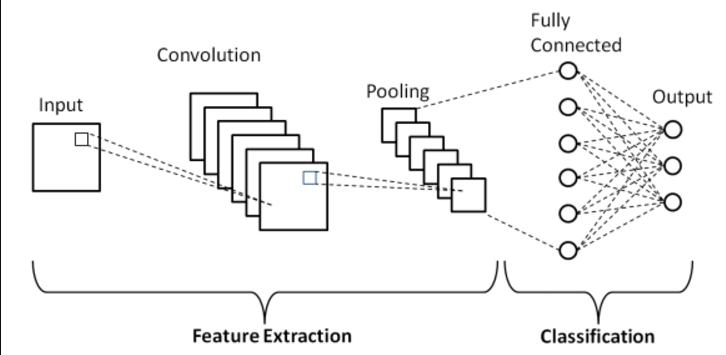

Here's a simple implementation of a Convolutional Neural Network (CNN) in Python using the Keras API from TensorFlow.

This example uses the MNIST dataset of handwritten digits:

**1. Import Required Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

**2. Load and Preprocess the Dataset**


In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**3. Define the CNN Model**

In [3]:
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and add fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4. Compile the Model**


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**5. Train the Model**

In [5]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.8809 - loss: 0.3984 - val_accuracy: 0.9827 - val_loss: 0.0683
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9825 - loss: 0.0548 - val_accuracy: 0.9848 - val_loss: 0.0526
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9868 - val_loss: 0.0465
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9892 - val_loss: 0.0394
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9937 - loss: 0.0185 - val_accuracy: 0.9898 - val_loss: 0.0342


**6. Evaluate the Model**


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 3s - 11ms/step - accuracy: 0.9910 - loss: 0.0286
Test Accuracy: 0.99


**7. Visualize Training History**


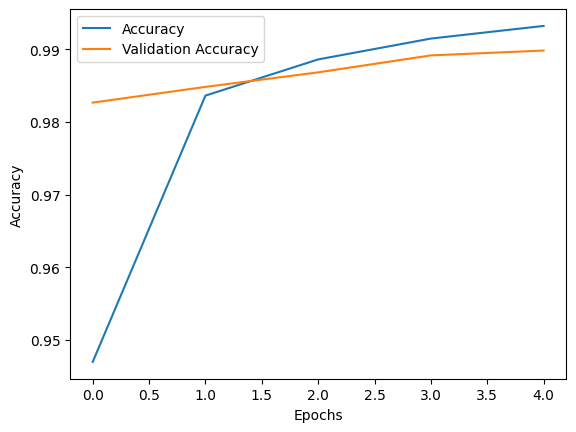

In [7]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**8. Testing the images**


In [8]:
# Predict the first test image
import numpy as np

predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])  # Get the label with the highest probability
true_label = np.argmax(y_test[0])            # True label

print(f"Predicted Label: {predicted_label}")
print(f"True Label: {true_label}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted Label: 7
True Label: 7


**9. Visualize the Predictions**

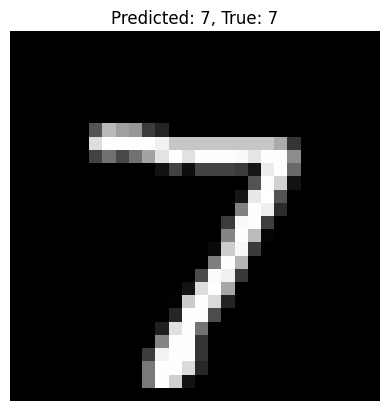

In [9]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

*This code will train a simple CNN model on the MNIST dataset and output its test accuracy. You can expand and fine-tune this model as needed!*
